Data Preprocessing

In [3]:
import pandas as pd

rain = pd.read_csv('./data/ACC - Rain -Albert Park Acc rainfall_20220818-20230818.csv', parse_dates=['Timestamp'])
rain.head()

,Timestamp,UTC Offset,Multiple Gauge Rainfall Recency Alarm (on/off),Quality,Rainfall (mm),Quality.1,Rainfall (Accumulated) (mm),Quality.2
0,2022-08-18 14:20:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic
1,2022-08-18 14:25:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic
2,2022-08-18 14:30:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic
3,2022-08-18 14:35:00,12,NaN,No data available,2.5,No quality or non-verified,2.5,Automated Process or Synthetic
4,2022-08-18 14:40:00,12,NaN,No data available,NaN,No data available,2.5,Automated Process or Synthetic


In [4]:
moist = pd.read_csv('./data/ACC - Soil Moisture - Mt Albert Grammar Rain_20220818-20230818_5mins.csv', parse_dates=['Timestamp'])
moist.head()

,Timestamp,UTC Offset,Soil Moisture Content (%V/V),Quality
0,2022-08-18 14:25:00,12,NaN,No data available
1,2022-08-18 14:30:00,12,52.1,No quality or non-verified
2,2022-08-18 14:35:00,12,NaN,No data available
3,2022-08-18 14:40:00,12,NaN,No data available
4,2022-08-18 14:45:00,12,52.1,No quality or non-verified


In [5]:
mtalbert = rain.merge(moist, on='Timestamp')
mtalbert.head()

,Timestamp,UTC Offset_x,Multiple Gauge Rainfall Recency Alarm (on/off),Quality_x,Rainfall (mm),Quality.1,Rainfall (Accumulated) (mm),Quality.2,UTC Offset_y,Soil Moisture Content (%V/V),Quality_y
0,2022-08-18 14:25:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic,12,NaN,No data available
1,2022-08-18 14:30:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic,12,52.1,No quality or non-verified
2,2022-08-18 14:35:00,12,NaN,No data available,2.5,No quality or non-verified,2.5,Automated Process or Synthetic,12,NaN,No data available
3,2022-08-18 14:40:00,12,NaN,No data available,NaN,No data available,2.5,Automated Process or Synthetic,12,NaN,No data available
4,2022-08-18 14:45:00,12,NaN,No data available,NaN,No data available,2.5,Automated Process or Synthetic,12,52.1,No quality or non-verified


In [6]:
mtalbert.drop(columns=['UTC Offset_x', 'Multiple Gauge Rainfall Recency Alarm (on/off)','Quality_x', 'Quality.1', 'Quality.2', 'UTC Offset_y', 'Quality_y'], inplace=True)
mtalbert.head()

,Timestamp,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
0,2022-08-18 14:25:00,NaN,0.0,NaN
1,2022-08-18 14:30:00,NaN,0.0,52.1
2,2022-08-18 14:35:00,2.5,2.5,NaN
3,2022-08-18 14:40:00,NaN,2.5,NaN
4,2022-08-18 14:45:00,NaN,2.5,52.1


In [7]:
# mtalbert.to_csv('./data/mtalbert.csv', index=False)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mtalbert = pd.read_csv('./data/mtalbert.csv', parse_dates=['Timestamp'])
mtalbert.head()

,Timestamp,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
0,2022-08-18 14:25:00,NaN,0.0,NaN
1,2022-08-18 14:30:00,NaN,0.0,52.1
2,2022-08-18 14:35:00,2.5,2.5,NaN
3,2022-08-18 14:40:00,NaN,2.5,NaN
4,2022-08-18 14:45:00,NaN,2.5,52.1


Taking care of missing data

In [9]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105154 entries, 0 to 105153
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Timestamp                     105154 non-null  datetime64[ns]
 1   Rainfall (mm)                 2851 non-null    float64       
 2   Rainfall (Accumulated) (mm)   105154 non-null  float64       
 3   Soil Moisture Content (%V/V)  34777 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 MB


In [10]:
mtalbert['Timestamp'] = (pd.to_datetime(mtalbert['Timestamp']).astype('int64') // 10**9).astype(int)


In [11]:
mtalbert['Rainfall (mm)'] = mtalbert['Rainfall (mm)'].fillna(0)
mtalbert['Soil Moisture Content (%V/V)'] = mtalbert['Soil Moisture Content (%V/V)'].interpolate(method='linear')
mtalbert.isna().sum()

Timestamp                       0
Rainfall (mm)                   0
Rainfall (Accumulated) (mm)     0
Soil Moisture Content (%V/V)    1
dtype: int64

In [12]:
mtalbert['Soil Moisture Content (%V/V)'].fillna(method='bfill', inplace=True)
mtalbert.isna().sum()

Timestamp                       0
Rainfall (mm)                   0
Rainfall (Accumulated) (mm)     0
Soil Moisture Content (%V/V)    0
dtype: int64

In [13]:
mtalbert.head()

,Timestamp,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
0,1660832700,0.0,0.0,52.1
1,1660833000,0.0,0.0,52.1
2,1660833300,2.5,2.5,52.1
3,1660833600,0.0,2.5,52.1
4,1660833900,0.0,2.5,52.1


In [14]:
X = mtalbert.iloc[:, :-1].values
print(X)

[[1.6608327e+09 0.0000000e+00 0.0000000e+00]
 [1.6608330e+09 0.0000000e+00 0.0000000e+00]
 [1.6608333e+09 2.5000000e+00 2.5000000e+00]
 ...
 [1.6923678e+09 0.0000000e+00 4.0500000e+01]
 [1.6923681e+09 0.0000000e+00 4.0500000e+01]
 [1.6923684e+09 0.0000000e+00 4.0500000e+01]]


In [15]:
y = mtalbert.iloc[:, -1].values
print(y)

[52.1   52.1   52.1   ... 49.647 49.647 49.647]


Training the Decision Tree Regression model on the whole dataset

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

Predicting a new result

In [17]:
# prediction_input = [[1.5, 1.5, 0.0]]
# prediction_input = [[pd.to_datetime('2022-08-18 14:25:00').timestamp(), 1.5, 0.0]]
prediction_input = np.array([[1.5, 0.0, 0.0]])

# Use the trained regressor for prediction
predicted_value = regressor.predict(prediction_input)

print(predicted_value)

[52.1]


Visualsing the Decision Tree Regression results

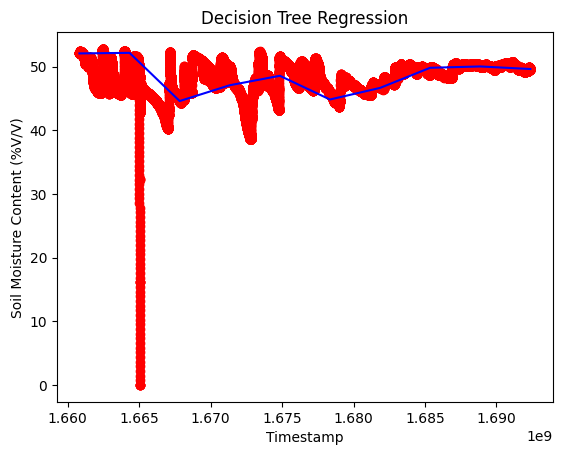

In [19]:
X_grid = np.linspace(min(X[:, 0]), max(X[:, 0]), 10).reshape(-1, 1)
# Create a synthetic dataset for prediction (use placeholder values)
prediction_input = np.column_stack([X_grid, np.ones_like(X_grid) * 1.5, np.zeros_like(X_grid)])

plt.plot(X[:, 0], y, color='red', marker='o', linestyle='None')
plt.plot(X_grid, regressor.predict(prediction_input), color='blue')
plt.title('Decision Tree Regression')
plt.xlabel('Timestamp')
plt.ylabel('Soil Moisture Content (%V/V)')
plt.show()